In [1]:
import pandas as pd

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import root_mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [ ]:
jan_pd = pd.read_parquet('../data/yellow_tripdata_2023-01.parquet')
feb_pd = pd.read_parquet('../data/yellow_tripdata_2023-02.parquet')

In [ ]:
# Read the data for January. How many columns are there?
print(f"January data has {jan_pd.shape[1]} columns")
# Read the data for February. How many columns are there?
print(f"February data has {feb_pd.shape[1]} columns")
print (jan_pd.shape)
print (feb_pd.shape)

In [ ]:
rides_pd = pd.concat([jan_pd, feb_pd], ignore_index=True)
# Print shape and data columns types
print(rides_pd.shape)
print(rides_pd.dtypes)

In [ ]:
# Create new column 'duration' in minutes, using the difference between 'tpep_dropoff_datetime' and 'tpep_pickup_datetime'
jan_pd['duration'] = (jan_pd['tpep_dropoff_datetime'] - jan_pd['tpep_pickup_datetime']).dt.total_seconds() / 60

# print stats of the duration column
print(jan_pd.duration.describe())

In [ ]:
# Create new column 'duration' in minutes, using the difference between 'tpep_dropoff_datetime' and 'tpep_pickup_datetime'
rides_pd['duration'] = (rides_pd['tpep_dropoff_datetime'] - rides_pd['tpep_pickup_datetime']).dt.total_seconds() / 60

# print stats of the duration column
print(rides_pd.duration.describe())

In [ ]:
df = pd.read_parquet('../data/yellow_tripdata_2023-01.parquet')

df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)
df = df[(df.duration >= 1) & (df.duration <= 60)]

# print stats of the duration column
print(df.duration.describe())


In [ ]:
# Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).
jan_pd2 = jan_pd[(jan_pd.duration >= 1) & (jan_pd.duration <= 60)]
print(f"January data: {jan_pd2.shape[0] / jan_pd.shape[0] * 100:.2f}% of records kept")

In [ ]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

jan_pd2[categorical] = jan_pd2[categorical].astype(str)

In [ ]:
train_dicts = jan_pd2[categorical + numerical].to_dict(orient='records')
print(f"Number of records in train_dicts: {len(train_dicts)}")

In [ ]:
print(train_dicts[0])

In [ ]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

target = 'duration'
y_train = jan_pd2[target].values

In [ ]:
X_train.shape, y_train.shape

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

root_mean_squared_error(y_train, y_pred)

In [ ]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

### VALIDATE MODEL

In [23]:
def read_dataframe(filename):
    df = pd.read_parquet(filename)
    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)
    df = df[(df.duration >= 1) & (df.duration <= 60)]
    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    return df

In [24]:
# VALIDATION OF THE MODEL
df_train = read_dataframe('../data/yellow_tripdata_2023-01.parquet')
df_val = read_dataframe('../data/yellow_tripdata_2023-02.parquet')

In [25]:
len(df_train), len(df_val)

(3009173, 2855951)

In [26]:
df_train

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.30,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.90,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.90,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.10,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.40,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,10.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.00,0.5,3.96,0.0,1.0,23.76,NaN,NaN,13.983333
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,22.43,0.00,0.5,2.64,0.0,1.0,29.07,NaN,NaN,19.450000
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,17.61,0.00,0.5,5.32,0.0,1.0,26.93,NaN,NaN,24.516667
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,18.15,0.00,0.5,4.43,0.0,1.0,26.58,NaN,NaN,13.000000


In [28]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

In [29]:
dv = DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [30]:
print(X_train[0])
print(X_val[0])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3 stored elements and shape (1, 516)>
  Coords	Values
  (0, 43)	1.0
  (0, 325)	1.0
  (0, 515)	0.97
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3 stored elements and shape (1, 516)>
  Coords	Values
  (0, 67)	1.0
  (0, 304)	1.0
  (0, 515)	0.3


In [31]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

#### Linear Regression

In [32]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_val = lr.predict(X_val)
y_pred_train = lr.predict(X_train)

In [33]:
print(root_mean_squared_error(y_train, y_pred_train))
print(root_mean_squared_error(y_val, y_pred_val))

7.658396474418433
7.820267421957621


In [36]:
import os

os.makedirs('models', exist_ok=True)
with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)

#### Lasso

In [ ]:
lr = Lasso(0.01)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)
root_mean_squared_error(y_val, y_pred)

8.137900681701906

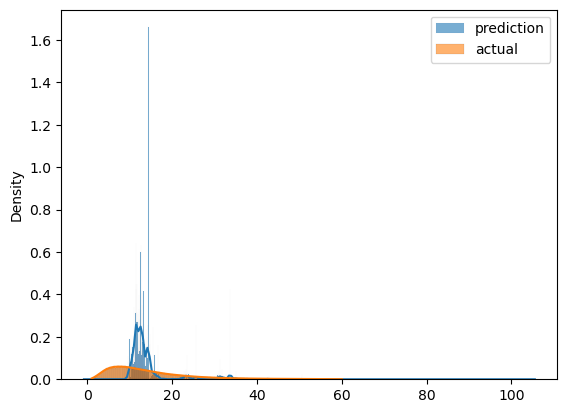

In [39]:
sns.histplot(y_pred, kde=True, stat="density", label='prediction', color="C0", alpha=0.6)
sns.histplot(y_val,  kde=True, stat="density", label='actual',     color="C1", alpha=0.6)
plt.legend()